# Load Trained Model

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [2]:
model = keras.models.load_model('dogs-vs-cats.h5')

Metal device set to: Apple M1 Max


2022-11-12 20:55:34.920069: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-12 20:55:34.920282: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
for layer in model.layers:
    print(layer.get_weights())

[array([[[[-5.06841168e-02, -1.93352491e-01, -4.10941802e-02,
          -1.68796312e-02, -1.94443390e-01,  1.86757538e-02,
           9.07030106e-02,  1.39951140e-01, -1.77705344e-02,
           7.82580152e-02,  1.60247758e-01,  3.04493384e-04,
          -6.63656369e-02,  1.50134802e-01, -1.01836681e-01,
           6.33556768e-02],
         [ 9.80446041e-02, -4.22157124e-02, -1.44227996e-01,
          -1.03855379e-01, -2.40287352e-02,  2.53061159e-03,
           2.41146386e-02,  1.29882365e-01, -1.86066583e-01,
          -1.94043651e-01, -3.48299444e-02,  7.25319386e-02,
           4.47207224e-03, -1.65522009e-01, -2.30327677e-02,
          -1.18519485e-01],
         [ 1.18015446e-01,  4.18320410e-02, -1.89278007e-01,
           1.77605510e-01, -8.71009007e-02, -1.05232202e-01,
           4.72141579e-02, -8.89431220e-03, -2.31743585e-02,
           2.14788341e-03,  1.21336490e-01, -2.67878305e-02,
          -1.28568560e-01,  8.52431059e-02, -1.19461685e-01,
           1.01562478e-01]],

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

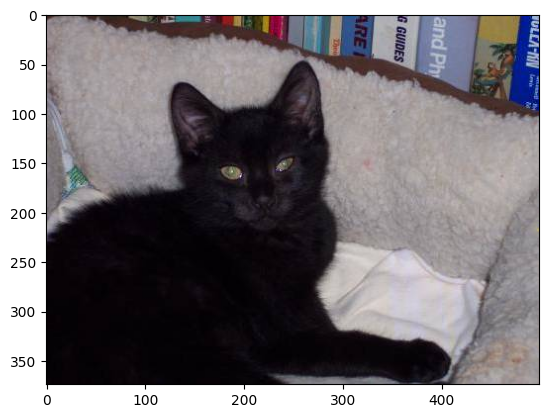

In [18]:
img = mpimg.imread('input_test/all_classes/9874.jpg')
plt.imshow(img)

In [21]:
print(img.shape)
print(type(img))

(374, 499, 3)
<class 'numpy.ndarray'>


In [20]:
reshape_img = img.resize((150, 150, 3))

ValueError: cannot resize this array: it does not own its data